In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

data_path = "../../../data/"
derrom_path = "../../"

import sys

# sys.path.append(derrom_path)
sys.path.insert(0,derrom_path)

import ELPH
import ELPH_utils
import derrom


## Paper Example Trajectory:

In [2]:
#system parameters
kmax = 2.
n_kmax = 200

system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)

In [3]:
init = system.get_init_cond_gauss(max_pos = 0.5/4, width = 0.025/4, density=0.05/4)

In [4]:
trajectory = system.get_full_trajectory(init, tmax = 2000.0, n_tmax = 400)

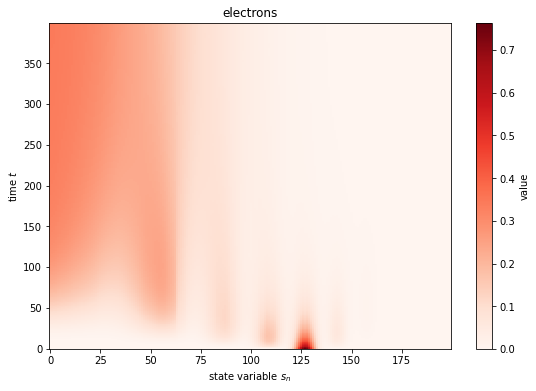

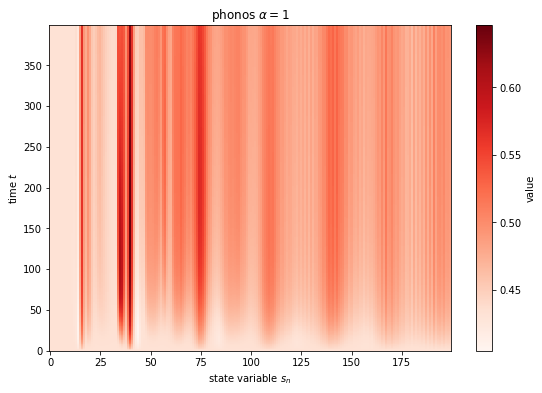

In [5]:
derrom.utils.plot_trajectory(trajectory[:,:system.n_kmax], 'electrons')

alpha = 0
derrom.utils.plot_trajectory(trajectory[:,system.n_kmax*(1+alpha):system.n_kmax*(2+alpha)],r'phonos $\alpha=$'+str(alpha+1))

In [6]:
el_trajectory = system.get_electron_trajectory(init, tmax = 2000.0, n_tmax = 400)

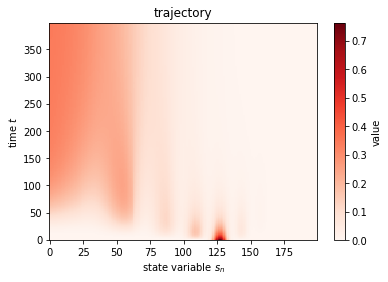

In [7]:
derrom.utils.plot_trajectory(el_trajectory)

In [8]:
# ELPH_utils.save_trajectories([el_trajectory], filename=data_path+'example_trajectory')

## Paper training and testing data set:


In [9]:
# system parameters
kmax = 2.
n_kmax = 200

system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)

n_runs = 1000

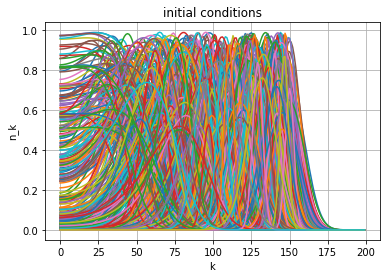

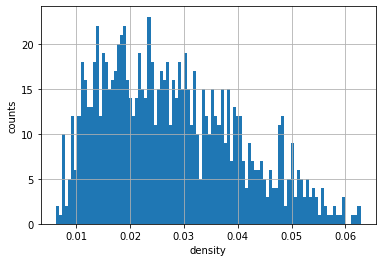

In [10]:
rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0/4, high=0.7/4, size=n_runs)
paras[:,1] = rng.uniform(low=0.02/4, high=0.1/4, size=n_runs)
paras[:,2] = 0.1/4

inits = ELPH_utils.get_gaussian_inits(system, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = system.get_electron_density(inits[r][:n_kmax])

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [ ]:
trajectory_list = []

for j in range(len(inits)):
    print('run ', j+1)
    trajectory_list.append(system.get_electron_trajectory(inits[j], tmax = 2000.0, n_tmax = 400))
    
    

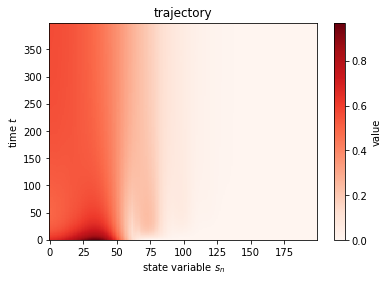

In [12]:
ind = 0

derrom.utils.plot_trajectory(trajectory_list[ind])

plt.show()

In [ ]:
# ELPH_utils.save_trajectories(trajectory_list, filename=data_path+'trajectories_n_kmax=200')